# Mission Dotlas 🌎 (40 points)

![Dotlas](https://camo.githubusercontent.com/6a3a3a9e55ce6b5c4305badbdc68c0d5f11b360b11e3fa7b93c822d637166090/68747470733a2f2f646f746c61732d776562736974652e73332e65752d776573742d312e616d617a6f6e6177732e636f6d2f696d616765732f6769746875622f62616e6e65722e706e67)

### 1.1 Overview ✉️

Welcome to your mission! In this notebook, you will download a dataset containing restaurants' information in the state of California, US. The dataset will then be transformed, processed and prepared in a required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

This is a template notebook that has some code already filled-in to help you on your way. There are also cells that require you to fill in the python code to solve specific problems. There are sections of the notebook that contain a points tally for code written. 

**Each section of this notebook is largely independent, so if you get stuck on a problem you can always move on to the next one.**

### 1.2 Tools & Technologies 🪛

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- When not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)

**Data Store**

![AWS](https://img.shields.io/badge/AWS-%23FF9900.svg?style=for-the-badge&logo=amazon-aws&logoColor=white)

---

### 2.1 Read California Restaurants 🔍 (3 points)

In this section, we will load the dataset from [AWS](https://googlethatforyou.com?q=amazon%20web%20services), conduct an exploratory data analysis and then clean up the dataset


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe (without writing to file)


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np

CELL_HEIGHT: int = 50

pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [2]:
import urllib, json


response = urllib.request.urlopen(DATA_URL)

data = json.loads(response.read())

print (data[:3])

[{'country': 'United States', 'subregion': 'California', 'city': 'Los Angeles', 'brand_name': 'Luv2Eat Thai Bistro', 'categories': ['Thai'], 'latitude': 34.09751, 'longitude': -118.335921, 'area': 'Hollywood', 'address': '6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90028-7178, United States', 'menu': [{'name': 'Main Menu', 'sections': [{'name': 'Appetizers', 'items': [{'name': 'Egg Rolls', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': 'Deep fried mixed veggie egg rolls served with sweet & sour sauce'}, {'name': 'Fried Tofu', 'price': {'value': 8.0, 'currency_code': 'USD'}, 'description': '(Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut'}, {'name': 'Fried Meat Balls', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'description': 'Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork'}, {'name': 'Pork Jerky', 'price': {'value': 8.5, 'currency_code': 'USD'}, 'descriptio

In [3]:
from pandas.io.json import json_normalize

In [4]:
s1 = json.dumps(data)
dict= json.loads(s1)
df = pd.json_normalize(dict) 

In [5]:
%%time
# ✏️ YOUR CODE HERE
# df: pd.DataFrame = ?

CPU times: total: 0 ns
Wall time: 0 ns


Create a restaurant ID column to uniquely index each restaurant


In [5]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   
1                                    90     0.0             0   

  rating_distribution  review_count                      review_topics awards  \
0  [2, 3, 4, 23, 104]            18  [Spicy, Casual, Neighborhood Gem]     []   
1     [0, 0, 0, 0, 0]             0                                 []     []   

  experiences                                               tags  \
0          []  [Delivery, Gluten-free Options, Late Night, No...   
1          []                                                 []   

  editorial_lists order_online_link  \
0              []              None   
1              []              None   

                                     facebook  \
0  http://www.facebook.com/luv2eatthaibistro/   
1                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  rating_by_feature.food  rating_by_feature.noise  \
0                      NaN                     4.7                      2.0   
1                      NaN                     0.0                      0.0   

   rating_by_feature.value  rating_by_feature.service  \
0                      4.6                        4.3   
1                      0.0                        0.0   

   rating_by_feature.ambience checklist.bar checklist.counter  \
0                         3.7         False             False   
1                         0.0          None              None   

  checklist.gifting checklist.waitlist checklist.has_pickup  \
0              None              False                 None   
1              None               None                 None   

   checklist.has_takeout checklist.waitlist_only  checklist.private_dining  \
0                   True                    True                     False   
1                  False                    None                     False   

  checklist.outdoor_seating checklist.high_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           18316 non-null  object 
 1   subregion                                         18316 non-null  object 
 2   city                                              18316 non-null  object 
 3   brand_name                                        18316 non-null  object 
 4   categories                                        18316 non-null  object 
 5   latitude                                          18316 non-null  float64
 6   longitude                                         18316 non-null  float64
 7   area                                              18316 non-null  object 
 8   address                                           10003 non-null  object 
 9   menu             

### 2.2 Basic Operations 🔧 (4 points)

#### 2.2.1 Restaurants by City 🌆 (1 point)

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |


In [8]:
# ✏️ YOUR CODE HERE

In [11]:
q1=df.groupby('city')['restaurant_id'].count()
q1=pd.DataFrame(q1)
q1['restaurant_count']=q1['restaurant_id']
q1=q1.drop('restaurant_id',axis=1)

In [12]:
q1['avg_rating']=df.groupby('city')['rating'].mean()

In [13]:
q1['avg_price_range_id']=df.groupby('city')['price_range_id'].mean()

In [14]:
q1['avg_reservation_advance']=df.groupby('city')['maximum_days_advance_for_reservation'].mean()

In [15]:
q1=q1.sort_values('restaurant_count',ascending=False)
q1['avg_rating']=round(q1['avg_rating'],5)
q1[['avg_price_range_id','avg_reservation_advance']]=round(q1[['avg_price_range_id','avg_reservation_advance']],4)
q1.head(5)

restaurant_count  avg_rating  avg_price_range_id  \
city                                                              
San Francisco              1645     2.59343              2.3617   
Los Angeles                1604     2.31995              2.2905   
San Diego                  1034     2.65493              2.2872   
San Jose                    372     1.54597              2.1640   
Sacramento                  329     1.68663              2.2675   

               avg_reservation_advance  
city                                    
San Francisco                  90.3453  
Los Angeles                    86.6920  
San Diego                      94.5783  
San Jose                       88.3011  
Sacramento                     95.0274

#### 2.2.2 Restaurants by Brand 🍔 (1 point)

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |


In [16]:
# ✏️ YOUR CODE HERE

In [17]:
q2=pd.DataFrame(df.groupby('brand_name')['restaurant_id'].count())
q2['restaurant_count']=q2['restaurant_id']
q2=q2.drop('restaurant_id',axis=1)

In [18]:
q2['avg_price_range_id']=df.groupby('brand_name')['price_range_id'].mean()
q2.sort_values('restaurant_count',ascending=False,inplace=True)

In [19]:
q2['avg_price_range_id']=q2['avg_price_range_id'].astype('int64')

In [20]:
q2.head(5)

restaurant_count  avg_price_range_id
brand_name                                                    
Denny's                                 73                   2
Ihop                                    37                   2
Buffalo Wild Wings                      32                   2
Black Bear Diner                        28                   2
Coco's Bakery Restaurant                24                   2

#### 2.2.3 Visualize Brands 📊 (2 points)

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants


In [21]:
# ✏️ YOUR CODE HERE

In [22]:
g=pd.DataFrame(df.groupby('brand_name')['review_count'].mean())
g['name']=g.index
g.sort_values('review_count')
g['count']=df.groupby('brand_name')['restaurant_id'].count()

In [23]:
f=g[g['count']>=5]
f=f.sort_values('review_count',ascending=False)

In [24]:
f=f.head(5)
f

review_count  \
brand_name                                             
Ruby's Diner                                0.833333   
Crepevine                                   0.400000   
Amici's East Coast Pizzeria                 0.222222   
Mikuni Japanese Restaurant & Sushi Bar      0.200000   
Urban Plates                                0.200000   

                                                                          name  \
brand_name                                                                       
Ruby's Diner                                                      Ruby's Diner   
Crepevine                                                            Crepevine   
Amici's East Coast Pizzeria                        Amici's East Coast Pizzeria   
Mikuni Japanese Restaurant & Sushi Bar  Mikuni Japanese Restaurant & Sushi Bar   
Urban Plates                                                      Urban Plates   

                                        count  
brand_name                                     
Ruby's Diner                                6  
Crepevine                                   5  
Amici's East Coast Pizzeria                 9  
Mikuni Japanese Restaurant & Sushi Bar      5  
Urban Plates                                5

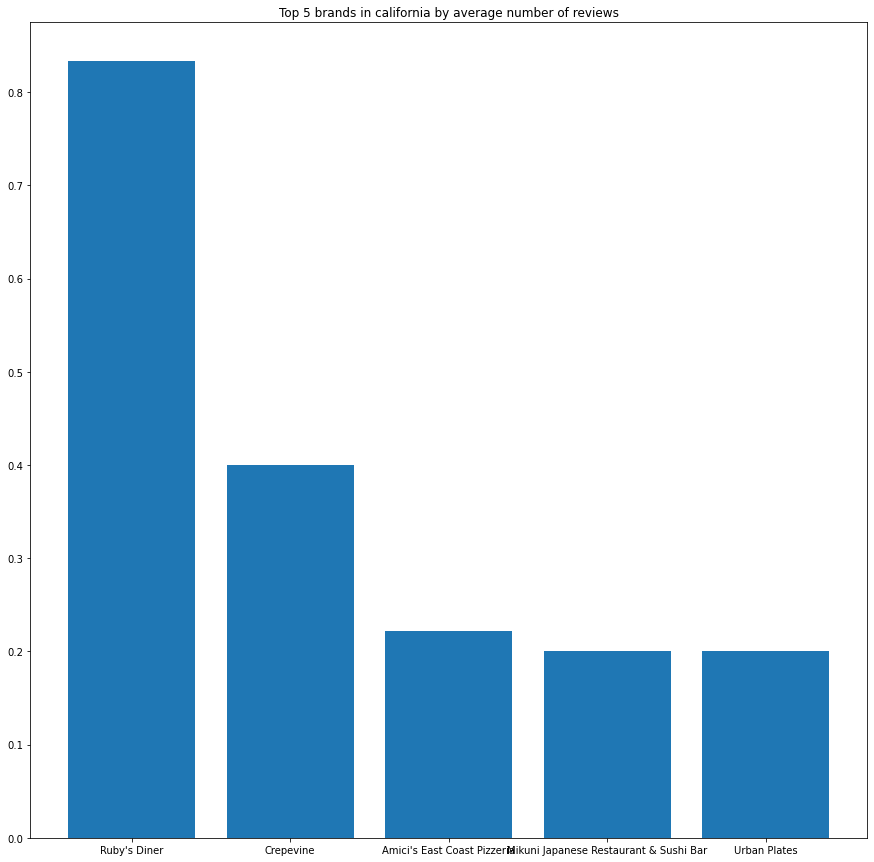

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.bar(f['name'],f['review_count'])
plt.title('Top 5 brands in california by average number of reviews')
plt.show()

In [26]:
px.bar(f['name'],f['review_count'],color=f['name'])

### 2.3 Transform Columns 🚚 (15 Points)

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### 2.3.1 Safety Precautions 🦺 (2 points)

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```


In [25]:
# ✏️ YOUR CODE HERE

In [27]:
df_1=df.filter(regex='^safety_precautions', axis="columns")

In [28]:
df_1=df_1.astype('str')

In [29]:
df_1['combined']=df['safety_precautions.cleanMenus'].replace([None],'').replace(True,'cleanMenus').replace(False,'')+','+df['safety_precautions.limitedSeating'].replace([None],'').replace(True,'limitedSeating').replace(False,'')+','+df['safety_precautions.sealedUtensils'].replace([None],'').replace(True,'sealedUtensils').replace(False,'')+','+df['safety_precautions.prohibitSickStaff'].replace([None],'').replace(True,'prohibitSickStaff').replace(False,'')+','+df['safety_precautions.requireDinerMasks'].replace([None],'').replace(True,'requireDinerMasks').replace(False,'')+','+df['safety_precautions.sanitizedSurfaces'].replace([None],'').replace(True,'sanitizedSurfaces').replace(False,'')+','+df['safety_precautions.staffIsVaccinated'].replace([None],'').replace(True,'staffIsVaccinated').replace(False,'')+','+df['safety_precautions.commonAreaCleaning'].replace([None],'').replace(True,'commonAreaCleaning').replace(False,'')+','+df['safety_precautions.contactlessPayment'].replace([None],'').replace(True,'contactlessPayment').replace(False,'')+','+df['safety_precautions.commonAreaDistancing'].replace([None],'').replace(True,'commonAreaDistancing').replace(False,'')+','+df['safety_precautions.requireWaitstaffMasks'].replace([None],'').replace(True,'requireWaitstaffMasks').replace(False,'')+','+df['safety_precautions.contactTracingCollected'].replace([None],'').replace(True,'contactTracingCollected').replace(False,'')+','+df['safety_precautions.dinerTempChecksRequired'].replace([None],'').replace(True,'dinerTempChecksRequired').replace(False,'')+','+df['safety_precautions.staffTempChecksRequired'].replace([None],'').replace(True,'staffTempChecksRequired').replace(False,'')+','+df['safety_precautions.proofOfVaccinationOutdoor'].replace([None],'').replace(True,'proofOfVaccinationOutdoor').replace(False,'')+','+df['safety_precautions.tableLayoutWithExtraSpace'].replace([None],'').replace(True,'tableLayoutWithExtraSpace').replace(False,'')+','+df['safety_precautions.proofOfVaccinationRequired'].replace([None],'').replace(True,'proofOfVaccinationRequired').replace(False,'')+','+df['safety_precautions.sanitizerProvidedForCustomers'].replace([None],'').replace(True,'sanitizerProvidedForCustomers').replace(False,'')

In [30]:
df_1.head(5)

safety_precautions.cleanMenus safety_precautions.limitedSeating  \
0                          None                              None   
1                          None                              None   
2                          None                              None   
3                          None                              None   
4                          True                             False   

  safety_precautions.sealedUtensils safety_precautions.prohibitSickStaff  \
0                              None                                 None   
1                              None                                 None   
2                              None                                 None   
3                              None                                 None   
4                              None                                 True   

  safety_precautions.requireDinerMasks safety_precautions.sanitizedSurfaces  \
0                                 None                                 None   
1                                 None                                 None   
2                                 None                                 None   
3                                 None                                 None   
4                                 True                                 True   

  safety_precautions.staffIsVaccinated safety_precautions.commonAreaCleaning  \
0                                 None                                  None   
1                                 None                                  None   
2                                 None                                  None   
3                                 None                                  None   
4                                 None                                  True   

  safety_precautions.contactlessPayment  \
0                                  None   
1                                  None   
2                                  None   
3                                  None   
4                                  None   

  safety_precautions.commonAreaDistancing  \
0                                    None   
1                                    None   
2                                    None   
3                                    None   
4                                   False   

  safety_precautions.requireWaitstaffMasks  \
0                                     None   
1                                     None   
2                                     None   
3                                     None   
4                                     True   

  safety_precautions.contactTracingCollected  \
0                                       None   
1                                       None   
2                                       None   
3                                       None   
4                                       None   

  safety_precautions.dinerTempChecksRequired  \
0                                       None   
1                                       None   
2                                       None   
3                                       None   
4                                       None   

  safety_precautions.staffTempChecksRequired  \
0                                       None   
1                                       None   
2                                       None   
3                                       None   
4                                       True   

  safety_precautions.proofOfVaccinationOutdoor  \
0                                         None   
1                                         None   
2                                         None   
3                                         None   
4                                         None   

  safety_precautions.tableLayoutWithExtraSpace  \
0                                         None   
1                                         None   
2                                         None   

In [31]:
df_1['combined']=df_1['combined'].str.split(',')
df_1['combined']

0                     [, , , , , , , , , , , , , , , , , ]
1                     [, , , , , , , , , , , , , , , , , ]
2                     [, , , , , , , , , , , , , , , , , ]
3                     [, , , , , , , , , , , , , , , , , ]
4        [cleanMenus, , , prohibitSickStaff, requireDin...
                               ...                        
18311                 [, , , , , , , , , , , , , , , , , ]
18312                 [, , , , , , , , , , , , , , , , , ]
18313                 [, , , , , , , , , , , , , , , , , ]
18314                 [, , , , , , , , , , , , , , , , , ]
18315                 [, , , , , , , , , , , , , , , , , ]
Name: combined, Length: 18316, dtype: object

In [32]:
def filtera(list1):
    return list(filter(None,list1))

In [33]:
df_1['combined']=df_1['combined'].map(filtera)

In [34]:
ans=df_1[df_1['combined'].map(lambda d: len(d)) > 0]

In [35]:
ans['combined'].head(5)

4     [cleanMenus, prohibitSickStaff, requireDinerMa...
15    [cleanMenus, sanitizedSurfaces, commonAreaClea...
17    [prohibitSickStaff, sanitizedSurfaces, commonA...
23    [cleanMenus, limitedSeating, prohibitSickStaff...
24    [cleanMenus, limitedSeating, sealedUtensils, p...
Name: combined, dtype: object

#### 2.3.2 Clean up HTML text 🥜 (2 points)

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```


In [36]:
# ✏️ YOUR CODE HERE

In [37]:
from bs4 import BeautifulSoup

In [38]:
df['description'].map(lambda text: BeautifulSoup(text, 'html.parser').get_text()).replace('\n','').replace('\r','')

C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



0        Luv2Eat Thai Bistro is located in Los Angeles,...
1        Feast on delicious grub at Jerry's Famous Deli...
2        Terrace Sushi serves Japanese cuisines to its ...
3        Hamburger Hamlet serves traditional American c...
4        WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...
                               ...                        
18311                                         Coming Soon!
18312                                         Coming Soon!
18313    ThirstyBear is the first & only Certified Orga...
18314    Welcome to Bua Thai Kitchen - Sausalito, CA. W...
18315    The Original Chulada Grill is a restaurant spe...
Name: description, Length: 18316, dtype: object

In [39]:
df['description'].map(lambda text: BeautifulSoup(text, 'html.parser').get_text())

0        Luv2Eat Thai Bistro is located in Los Angeles,...
1        Feast on delicious grub at Jerry's Famous Deli...
2        Terrace Sushi serves Japanese cuisines to its ...
3        Hamburger Hamlet serves traditional American c...
4        WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...
                               ...                        
18311                                         Coming Soon!
18312                                         Coming Soon!
18313    ThirstyBear is the first & only Certified Orga...
18314    Welcome to Bua Thai Kitchen - Sausalito, CA. W...
18315    The Original Chulada Grill is a restaurant spe...
Name: description, Length: 18316, dtype: object

#### 2.3.3 Imputing 📈 (3 points)

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating

Here's an example:

|restaurant_id	|brand_name|	area|	city|	rating|	imputed_rating_brand | imputed_rating_area| imputed_rating_city
| --- | --- | --- | --- | --- | --- | --- | --- |
|1	|X1|	A1|	B1|	3|	3| 3 | 3 |
|2	|X1|	A1|	B1|	2|	2| 2 | 2 |
|3	|X1|	A1|	B1|	| 2.5| 2.5 | 2.5 |
|4	|X2|	A1|	B1|	4|	4 | 4 | 4 |
|5	|X3|	A1|	B1|	|	 | 2.75 | 2.75 |
|6	|X4|	A4|	B2|	|	 | | 3 |
|7	|X5|	A6|	B2|	2|	 2| 2| 2|
|8	|X6|	A7|	B2|	4|	 4| 4| 4 |


In [39]:
# ✏️ YOUR CODE HERE

In [40]:
df_=df[['restaurant_id','brand_name','area','city','rating']]

In [41]:
import numpy as np
df_['rating']=df_['rating'].replace(0,np.nan)

In [42]:
df.groupby('brand_name')['rating'].transform('median')

0        4.6
1        0.0
2        0.0
3        0.0
4        4.7
        ... 
18311    0.0
18312    0.0
18313    3.9
18314    4.5
18315    0.0
Name: rating, Length: 18316, dtype: float64

In [43]:
df_['imputed_rating_brand']=df_['rating'].fillna(df_.groupby('brand_name')['rating'].transform('median'))

In [44]:
df_['imputed_rating_area']=df_['rating'].fillna(df_.groupby('area')['rating'].transform('median'))

In [45]:
df_['imputed_rating_city']=df_['rating'].fillna(df_.groupby('city')['rating'].transform('median'))

In [46]:
df_=df_.set_index('restaurant_id')

In [47]:
df_

brand_name  \
restaurant_id                                
1                      Luv2Eat Thai Bistro   
2                      Jerry's Famous Deli   
3                            Terrace Sushi   
4              Hamburger Hamlet - Pasadena   
5                       Centanni - Burbank   
...                                    ...   
18312                           Crema Cafe   
18313                       Dynasty Garden   
18314                         Thirsty Bear   
18315                     Bua Thai Kitchen   
18316           The Original Chulada Grill   

                                                          area           city  \
restaurant_id                                                                   
1                                                    Hollywood    Los Angeles   
2                                                 Sherman Oaks   Sherman Oaks   
3                                                     Pasadena       Pasadena   
4                                                     Pasadena       Pasadena   
5                                                      Burbank        Burbank   
...                                                        ...            ...   
18312          Huntington Beach / Seal Beach / Fountain Valley     Seal Beach   
18313                                                  Modesto        Modesto   
18314                                                     SOMA  San Francisco   
18315                                                Sausalito      Sausalito   
18316                                             Mid-Wilshire    Los Angeles   

               rating  imputed_rating_brand  imputed_rating_area  \
restaurant_id                                                      
1                 4.6                   4.6                 4.60   
2                 NaN                   NaN                 4.30   
3                 NaN                   NaN                 4.40   
4                 NaN                   NaN                 4.40   
5                 4.7                   4.7                 4.70   
...               ...                   ...                  ...   
18312             NaN                   NaN                 4.40   
18313             NaN                   NaN                 4.55   
18314             3.9                   3.9                 3.90   
18315             4.5                   4.5                 4.50   
18316             NaN                   NaN                 4.20   

               imputed_rating_city  
restaurant_id                       
1                              4.6  
2                              4.4  
3                              4.4  
4                              4.4  
5                              4.7  
...                            ...  
18312                          4.4  
18313                          4.6  
18314                          3.9  
18315                          4.5  
18316                          4.4  

[18316 rows x 7 columns]

#### 2.3.4 Analytical Transformations (8 points)

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">


##### 2.3.4a Operating Hours 🕰️

Create an operating hours [bitmap](https://en.wikipedia.org/wiki/Bit_array) column from the operating hours text column for all restaurants. The bitmap would be a matrix of size 24 x 7 where a 1 or 0 on each cell indicates whether the restaurant is operating on a specific day at a specific hour

Example: For operating hours text of the form:

```tex
Lunch
Daily 11:00 am–3:30 pm
Dinner
Daily 4:30 pm–11:30 pm
```

Create a bitmap of the following form:

```json
{
    "Monday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    "Tuesday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    .
    .
    .
    "Sunday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],

}
```


In [48]:
# ✏️ YOUR CODE HERE

##### 2.3.4b On my radar 🗺️

For the following restaurant:

- brand_name `Calzone's Pizza Cucina`
- coordinates `37.799068, -122.408226`.

Answer these questions:

- How many restaurants exist within a 100 meter radius of this restaurant?
- What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?

In [48]:
df_c=df.rename(columns = {'lat':'latitude','lon':'longitude'})

In [49]:
df_n=df_c.iloc[:,1:17]
df_n.head(5)

subregion          city                   brand_name  \
0  California   Los Angeles          Luv2Eat Thai Bistro   
1  California  Sherman Oaks          Jerry's Famous Deli   
2  California      Pasadena                Terrace Sushi   
3  California      Pasadena  Hamburger Hamlet - Pasadena   
4  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   
2  <p>Terrace Sushi serves Japanese cuisines to i...           None   
3  <p>Hamburger Hamlet serves traditional America...           None   
4  <br />WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style  
0                   Thai  Casual Dining  
1               American  Casual Dining  
2                Spanish  Casual Dining  
3  Contemporary American  Casual Dining  
4                Italian  Casual Dining

In [50]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [-122.408226,37.799068, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6371* c
    return km

In [51]:
df_n['distance'] = df_n.apply(
    lambda row: haversine(row['longitude'], row['latitude']), 
    axis=1)
# To check the data frame if it has a new column of hotel name (for each and every member's location in the list)
df_n.head(5)

subregion          city                   brand_name  \
0  California   Los Angeles          Luv2Eat Thai Bistro   
1  California  Sherman Oaks          Jerry's Famous Deli   
2  California      Pasadena                Terrace Sushi   
3  California      Pasadena  Hamburger Hamlet - Pasadena   
4  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   
2  <p>Terrace Sushi serves Japanese cuisines to i...           None   
3  <p>Hamburger Hamlet serves traditional America...           None   
4  <br />WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style    distance  
0                   Thai  Casual Dining  551.044520  
1               American  Casual Dining  539.486118  
2                Spanish  Casual Dining  558.745909  
3  Contemporary American  Casual Dining  560.060057  
4                Italian  Casual Dining  545.730339

In [52]:
q234=df_n[df_n['distance']<=0.1]
len(q234)

21

In [53]:
q234['primary_cuisine'].mode()

0    Italian
Name: primary_cuisine, dtype: object

In [55]:
# ✏️ YOUR CODE HERE

---

Remember to hydrate and 

[![Spotify](https://img.shields.io/badge/Spotify-1ED760?style=for-the-badge&logo=spotify&logoColor=white)](https://open.spotify.com/playlist/3d4bU6GAelt3YL2L1X2SOn)

---

### 2.4 Menu-Level Table 🧾 (8 points)

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |


In [56]:
# ✏️ YOUR CODE HERE

In [6]:
for i in df['menu']:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[{'name': 'Main Menu', 'sections': [{'name': 'Starters', 'items': [{'name': 'Organic Hummus & Flatbread', 'price': {'value': 12.0, 'currency_code': 'USD'}, 'description': 'Pickled Crudité, Feta, Zhoug, EVOO'}, {'name': 'Smoked Deviled Eggs', 'price': {'value': 12.5, 'currency_code': 'USD'}, 'description': 'Bacon, Pickled Jalapenos, Chili Oil, Paprika'}, {'name': 'Bone Marrow', 'price': {'value': 16.0, 'currency_code': 'USD'}, 'description': 'Tomato Jam, Parsley, Frisee, Toast'}, {'name': 'Wood Grilled Octopus', 'price': {'value': 17.5, 'currency_code': 'USD'}, 'description': 'Crispy Potatoes, Romesco, Watercress'}, {'name': 'Griddled Cornbread', 'price': {'value': 9.5, 'currency_code': 'USD'}, 'description': 'Calabrian Chili-Honey Butter'}, {'name': 'Chicken Taco Pellizco', 'price': {'value': 13.0, 'currency_code': 'USD'}, 'description': 'Smoked Chicken, Roasted Tomatillo, Chipotle Crema'}, {'name': 'Soy Ginger Chicken Wings', 'price': {'value': 12.0, 'currency_code': 'USD'}, 'descript

In [7]:
for j in i :
    print(j)

{'name': 'Main Menu', 'sections': [{'name': 'Combinations', 'items': [{'name': 'Mole Oaxaqueño W/Chicken Breast', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': 'Includes rice, beans, cheese, and tortillas.'}, {'name': 'Grilled Chicken Breast & Steak Plate', 'price': {'value': 15.0, 'currency_code': 'USD'}, 'description': 'Chicken special marinated w/mango-orange sauce, rice, beans, salsa, avocado, and tortillas.'}, {'name': 'Grilled Chicken Breast or Steak Fajitas', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': 'Grilled chicken breast or steak fajitas (or mixed $2.50 Extra). Choice of meat with onions, bell peppers, tomatoes, rice, beans, and tortillas.'}, {'name': 'Two Cheese Enchiladas', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': '(Choice of red, green sauce or mole). With rice and beans. Choice of beef or chicken.'}, {'name': 'Tilapia Fish Filet', 'price': {'value': 14.0, 'currency_code': 'USD'}, 'description': 'Fresh fish 

In [8]:
pd.DataFrame(j)

name                                           sections description  \
0   Main Menu  {'name': 'Combinations', 'items': [{'name': 'M...               
1   Main Menu  {'name': 'Burritos', 'items': [{'name': 'Chula...               
2   Main Menu  {'name': 'Deluxe Burritos', 'items': [{'name':...               
3   Main Menu  {'name': 'Salads and Wraps', 'items': [{'name'...               
4   Main Menu  {'name': 'A La Carte', 'items': [{'name': 'Chu...               
5   Main Menu  {'name': 'Sopas (Soup)', 'items': [{'name': 'G...               
6   Main Menu  {'name': 'Hamburgers', 'items': [{'name': 'Ham...               
7   Main Menu  {'name': 'Tacos', 'items': [{'name': 'Carne As...               
8   Main Menu  {'name': 'Side Orders', 'items': [{'name': 'Be...               
9   Main Menu  {'name': 'Hot Tortas', 'items': [{'name': 'Car...               
10  Main Menu  {'name': 'Breakfast', 'items': [{'name': 'Huev...               
11  Main Menu  {'name': 'Breakfast Burrito', 'items': [{'name...               
12  Main Menu  {'name': 'Appetizers', 'items': [{'name': 'Fri...               
13  Main Menu  {'name': 'Desserts', 'items': [{'name': 'Flan'...               
14  Main Menu  {'name': 'Beverages', 'items': [{'name': 'Coff...               

   provider_name  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  
10          None  
11          None  
12          None  
13          None  
14          None

In [9]:
for k in j:
    print(k)

name
sections
description
provider_name


### 3.1 Analytical Questions ⚗️ (10 points)

**Answer ONLY ONE of the Questions using the Data, i.e, choose between `3.1.1`, `3.1.2` or `3.1.3`**

<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories


#### 3.1.1 Take me out for dinner 🕯️

Which areas according to you have the best restaurants in California and why? You can define best based on whatever criteria you wish as long as it involves measuring more than a single column. For ex. You cannot merely claim that the restaurant with the highest rating is the best restaurant.


In [ ]:
# ✏️ YOUR CODE HERE

#### 3.1.2 Michelin Approves 🎖️

Which columns seem to play / not play a major factor in whether or not the restaurant has an award? Justify your options


In [54]:
# simple dataframe to look at distribution of awards across california by most awarded titles
awards_df: pd.DataFrame = pd.json_normalize(df["awards"].dropna().explode()).rename(
    columns={"name": "award_name", "location": "award_location"}
)
awards_df["award_name"].value_counts().to_frame().head(10).rename(
    columns={"award_name": "award_count"}
).transpose()

Most Booked  Best Ambiance  Best Food  Best Overall  \
award_count          414            404        402           402   

             Best Service  Best Value  Special Occasion  Romantic  \
award_count           401         400               398       393   

             Fit for Foodies  Vibrant Bar Scene  
award_count              391                389

In [55]:
# ✏️ YOUR CODE HERE

#### 3.1.3 Principal Components 🥨

Which columns are highly correlated between each other and can be treated as redundant?


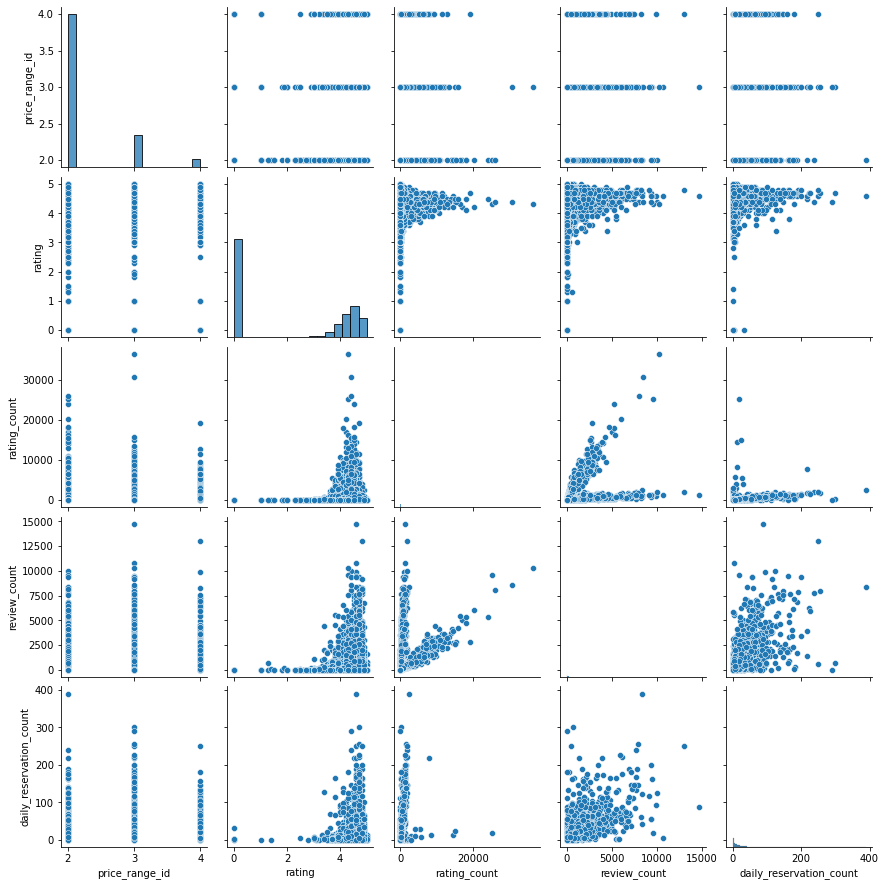

In [56]:
# Creating a pairplot for already numeric columns in dataframe
import seaborn as sns
pairplot_cols: list[str] = [
    "price_range_id",
    "rating",
    "rating_count",
    "review_count",
    "daily_reservation_count",
]
sns.pairplot(df[pairplot_cols])


In [57]:
# ✏️ YOUR CODE HERE - may require encoding categorical string variables

In [58]:
df.head(5)

country   subregion          city                   brand_name  \
0  United States  California   Los Angeles          Luv2Eat Thai Bistro   
1  United States  California  Sherman Oaks          Jerry's Famous Deli   
2  United States  California      Pasadena                Terrace Sushi   
3  United States  California      Pasadena  Hamburger Hamlet - Pasadena   
4  United States  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   
2  <p>Terrace Sushi serves Japanese cuisines to i...           None   
3  <p>Hamburger Hamlet serves traditional America...           None   
4  <br />WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style executive_chef_name    parking_info  \
0                   Thai  Casual Dining                None  Street Parking   
1               American  Casual Dining                None            None   
2                Spanish  Casual Dining                None            None   
3  Contemporary American  Casual Dining                None            None   
4                Italian  Casual Dining        Marin Santos     Private Lot   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   
2  Business Casual          None   
3  Business Casual          None   
4     Casual Dress          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   
2                                               None               2   
3                                               None               2   
4  Dinner\nMon–Thu 5:00 pm–8:30 pm\nFri, Sat 5:00...               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   
2  $30 and under                                  []   
3  $30 and under                                  []   
4  $30 and under  [AMEX, Discover, MasterCard, Visa]   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   
1                                    90     0.0      

In [59]:
for i in df.columns:
    print(i,':',len(df[i].astype('str').unique()),'  Percent :',round((len(df[i].astype('str').unique())/len(df))*100))

country : 1   Percent : 0
subregion : 1   Percent : 0
city : 762   Percent : 4
brand_name : 17543   Percent : 96
categories : 3769   Percent : 21
latitude : 17421   Percent : 95
longitude : 17563   Percent : 96
area : 566   Percent : 3
address : 9618   Percent : 53
menu : 15768   Percent : 86
description : 11849   Percent : 65
public_transit : 1888   Percent : 10
cross_street : 5013   Percent : 27
restaurant_website : 13209   Percent : 72
phone_number : 17558   Percent : 96
primary_cuisine : 179   Percent : 1
dining_style : 5   Percent : 0
executive_chef_name : 4169   Percent : 23
parking_info : 6   Percent : 0
dress_code : 7   Percent : 0
entertainment : 1323   Percent : 7
operating_hours : 7688   Percent : 42
price_range_id : 3   Percent : 0
price_range : 3   Percent : 0
payment_options : 63   Percent : 0
maximum_days_advance_for_reservation : 44   Percent : 0
rating : 36   Percent : 0
rating_count : 1856   Percent : 10
rating_distribution : 8106   Percent : 44
review_count : 2067   

In [60]:
df_3=df.copy()

In [61]:
df_3=df_3.select_dtypes('object','bool')

In [62]:
df_3=df_3.astype('str')

In [63]:
unique_ser = df_3.apply(lambda col: col.nunique(), axis=0)

In [64]:
to_drop_col=unique_ser[(unique_ser/len(df))*100>21]

In [65]:
dro=pd.DataFrame(to_drop_col).index

In [66]:
df_3=df_3.drop(['country','subregion'],axis=1)

In [67]:
df_3=df_3.drop(dro,axis=1)

In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_3=df_3.apply(LabelEncoder().fit_transform)

In [69]:
df_int=df.select_dtypes(['int64','float64'])

In [70]:
df_corr=pd.concat([df_3,df_int],axis=1)

In [71]:
df_corr.corr()

city  categories      area  public_transit  \
city                        1.000000    0.009923  0.727083       -0.022107   
categories                  0.009923    1.000000  0.007790        0.009105   
area                        0.727083    0.007790  1.000000        0.004989   
public_transit             -0.022107    0.009105  0.004989        1.000000   
primary_cuisine             0.011311    0.989909  0.006935        0.001352   
...                              ...         ...       ...             ...   
rating_by_feature.noise     0.032594   -0.003626 -0.013305       -0.218828   
rating_by_feature.value     0.030832    0.006665 -0.012823       -0.214757   
rating_by_feature.service   0.033548    0.008026 -0.011721       -0.213222   
rating_by_feature.ambience  0.032787    0.002468 -0.012301       -0.217032   
restaurant_id               0.005838   -0.010305  0.002305        0.000623   

                            primary_cuisine  dining_style  parking_info  \
city                               0.011311      0.015924      0.044760   
categories                         0.989909      0.042000      0.015706   
area                               0.006935     -0.023332     -0.013622   
public_transit                     0.001352     -0.101349     -0.179556   
primary_cuisine                    1.000000      0.050409      0.034333   
...                                     ...           ...           ...   
rating_by_feature.noise            0.022252      0.366871      0.659694   
rating_by_feature.value            0.032970      0.373599      0.650041   
rating_by_feature.service          0.034929      0.399529      0.673296   
rating_by_feature.ambience         0.029389      0.406526      0.676350   
restaurant_id                     -0.010913     -0.004681     -0.005589   

                            dress_code  entertainment  price_range  \
city                          0.019097      -0.009727     0.020823   
categories                   -0.030117       0.002732     0.010260   
area                         -0.014967       0.003262    -0.011750   
public_transit               -0.116130       0.009417    -0.134698   
primary_cuisine              -0.017956      -0.000682     0.021665   
...                                ...            ...          ...   
rating_by_feature.noise       0.424285      -0.134329     0.266277   
rating_by_feature.value       0.415824      -0.112261     0.281650   
rating_by_feature.service     0.435974      -0.123621     0.299298   
rating_by_feature.ambience    0.444708      -0.125745     0.308630   
restaurant_id                -0.007274      -0.000772    -0.001883   

                            payment_options  review_topics    awards  \
city                              -0.032728      -0.029819 -0.003066   
categories                        -0.010681       0.025312  0.074097   
area                               0.015720       0.004851 -0.017380   
public_transit                     0.170348       0.127396 -0.162731   
primary_cuisine                   -0.037952       0.008379  0.083904   
...                                     ...            ...       ...   
rating_by_feature.noise           -0.782552      -0.690426  0.382832   
rating_by_feature.value           -0.774745      -0.690945  0.382696   
rating_by_feature.service         -0.801187      -0.708605  0.380948   
rating_by_feature.ambience        -0.802663      -0.700405  0.390693   
restaurant_id                      0.005167      -0.005240 -0.011298   

                            experiences  editorial_lists  order_online_link  \
city                           0.004702         0.044755           0.012329   
categories                    -0.004888         0.034899           0.004157   
area                          -0.005077        -0.004113           0.007830   
public_transit                -0.076469        -0.121084          -0.077758   
primary_cuisine                0.000714         0.046775           0.009038   
...           

<AxesSubplot:>

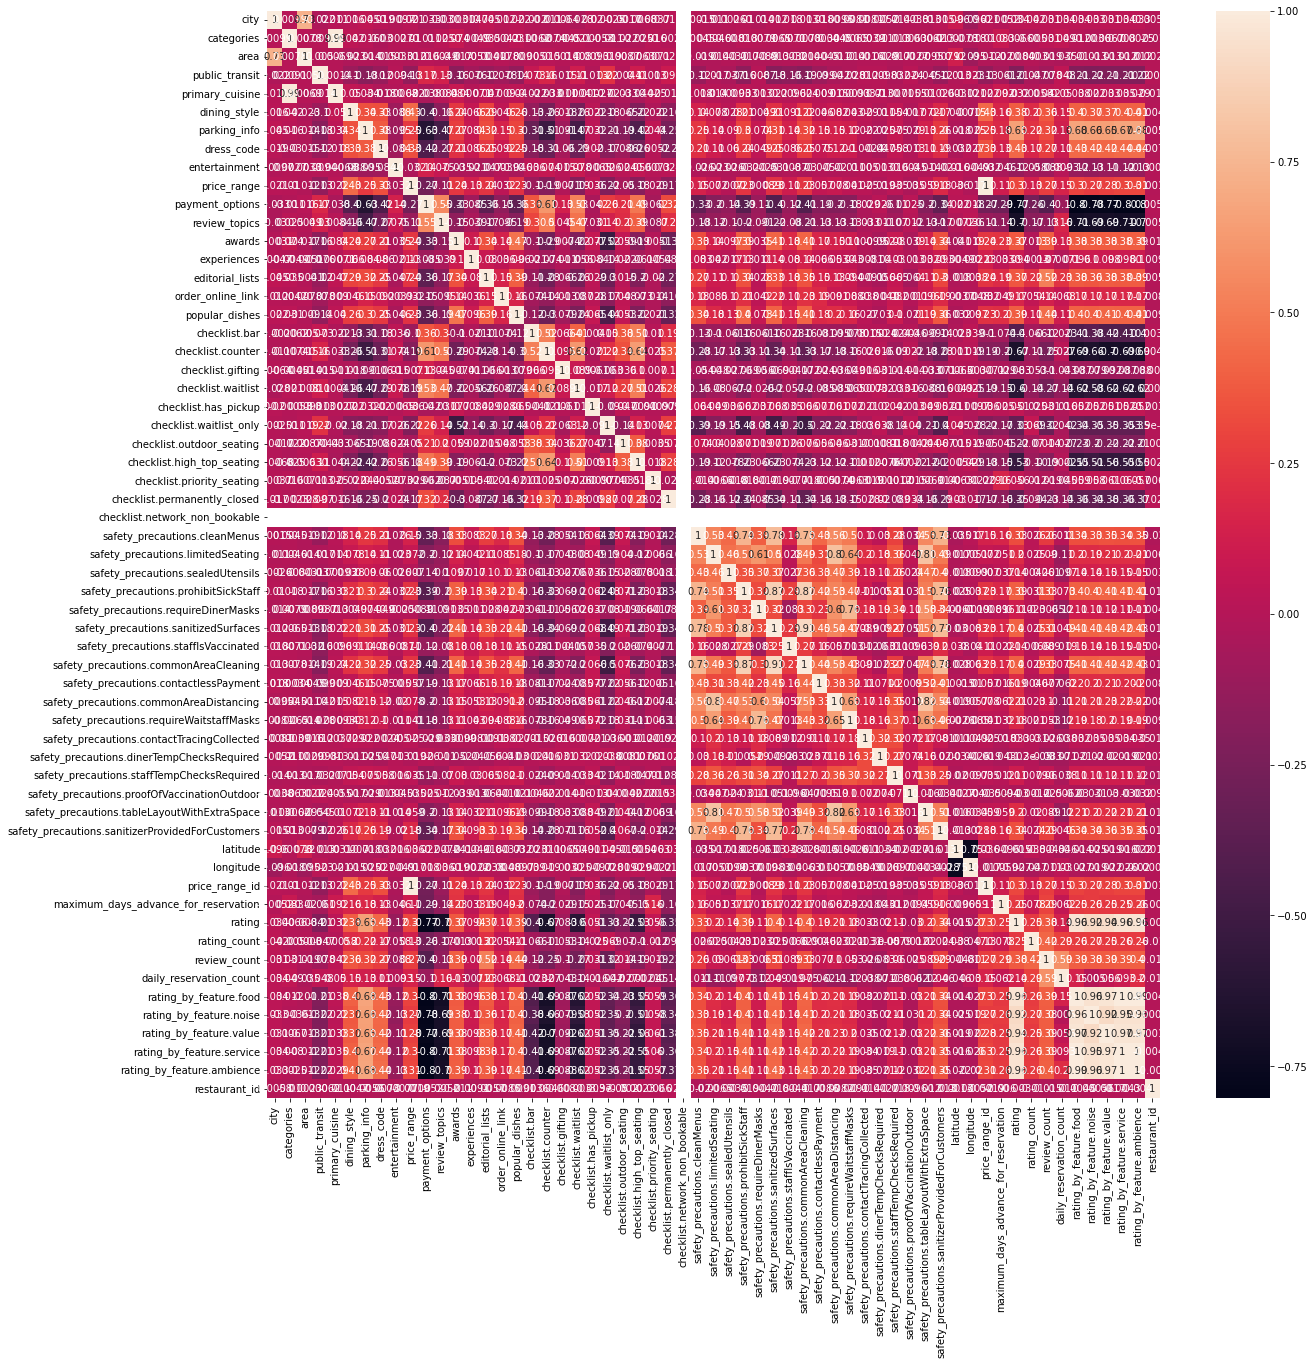

In [72]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(),annot=True)

In [73]:
import numpy as np
# Create correlation matrix
corr_matrix = df_corr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
#df_corr.drop(to_drop, axis=1, inplace=True)

In [74]:
to_drop

['primary_cuisine',
 'safety_precautions.sanitizedSurfaces',
 'safety_precautions.commonAreaCleaning',
 'price_range_id',
 'rating_by_feature.food',
 'rating_by_feature.noise',
 'rating_by_feature.value',
 'rating_by_feature.service',
 'rating_by_feature.ambience']

# country and subregion were eliminated as they only had one value

---

Good job!

<img src="https://media.giphy.com/media/qLhxN7Rp3PI8E/giphy.gif" height="250px" width="250px" alt="legend of zelda">